<a href="https://colab.research.google.com/github/fahad4562/ML-Code/blob/main/Fahad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the CSV file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_total = pd.read_csv("/Moneygram_Reviews.csv.zip")
print(df_total.shape)
df_total.head()

(9893, 7)


,Author,Reviews,Location,Ratings,Review Title,Review Text,Date of Experience
0,Uha,1,TO,5,I totally understand that rates are…,I totally understand that rates are fluctuatin...,2024-05-23
1,Rene,1,US,5,I have not encountered any issues…,I have not encountered any issues whatsoever. ...,2024-05-09
2,Runi Saad,10,GB,5,Moneygram is a good and reliable company,Moneygram always my favourite company when I t...,2024-05-19
3,NK,1,AU,5,Convenient and efficient,"Quick and simple transaction via the App, very...",2024-04-30
4,Sambamwani,1,GB,5,You have been so much helpful as the…,You have been so much helpful as the recipient...,2024-05-23


In [ ]:
df_copy=df_total[:9800]
df=df_copy.copy()

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().value_counts()

,,,,,,,count
Author,Reviews,Location,Ratings,Review Title,Review Text,Date of Experience,
False,False,False,False,False,False,False,9799
True,False,False,False,False,False,False,1


In [ ]:
df.dropna(axis=1)

,Reviews,Location,Ratings,Review Title,Review Text,Date of Experience
0,1,TO,5,I totally understand that rates are…,I totally understand that rates are fluctuatin...,2024-05-23
1,1,US,5,I have not encountered any issues…,I have not encountered any issues whatsoever. ...,2024-05-09
2,10,GB,5,Moneygram is a good and reliable company,Moneygram always my favourite company when I t...,2024-05-19
3,1,AU,5,Convenient and efficient,"Quick and simple transaction via the App, very...",2024-04-30
4,1,GB,5,You have been so much helpful as the…,You have been so much helpful as the recipient...,2024-05-23
...,...,...,...,...,...,...
9795,1,US,4,Fast and efficient,No review text,2023-03-26
9796,1,US,5,It’s really convenient for me,No review text,2023-03-20
9797,1,US,5,Quick,"Quick, convenient, easy and cheap way to send ...",2023-03-26
9798,4,GB,5,Moneygram app 5stars,I use the moneygram app to send money to my fa...,2023-03-06


In [ ]:
df['Ratings'].value_counts().sort_index()

,count
Ratings,
1,598
2,181
3,350
4,945
5,7726


In [ ]:
ratings = pd.DataFrame(df['Ratings'].value_counts()).sort_values('Ratings')
ratings.count

<bound method DataFrame.count of          count
Ratings       
1          598
2          181
3          350
4          945
5         7726>

In [ ]:
df.isna().sum().sum()

1

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
print(df.columns)

Index(['Author', 'Reviews', 'Location', 'Ratings', 'Review Title',
       'Review Text', 'Date of Experience'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Author              9799 non-null   object
 1   Reviews             9799 non-null   int64 
 2   Location            9799 non-null   object
 3   Ratings             9799 non-null   int64 
 4   Review Title        9799 non-null   object
 5   Review Text         9799 non-null   object
 6   Date of Experience  9799 non-null   object
dtypes: int64(2), object(5)
memory usage: 612.4+ KB


In [ ]:
sentiments = ['positive' if i== 5 else 'negative' for i in df['Ratings']]
df['sentiments'] = sentiments
df

,Author,Reviews,Location,Ratings,Review Title,Review Text,Date of Experience,sentiments
0,Uha,1,TO,5,I totally understand that rates are…,I totally understand that rates are fluctuatin...,2024-05-23,positive
1,Rene,1,US,5,I have not encountered any issues…,I have not encountered any issues whatsoever. ...,2024-05-09,positive
2,Runi Saad,10,GB,5,Moneygram is a good and reliable company,Moneygram always my favourite company when I t...,2024-05-19,positive
3,NK,1,AU,5,Convenient and efficient,"Quick and simple transaction via the App, very...",2024-04-30,positive
4,Sambamwani,1,GB,5,You have been so much helpful as the…,You have been so much helpful as the recipient...,2024-05-23,positive
...,...,...,...,...,...,...,...,...
9795,Anniesha,1,US,4,Fast and efficient,No review text,2023-03-26,negative
9796,Ezekiel,1,US,5,It’s really convenient for me,No review text,2023-03-20,positive
9797,Cesar,1,US,5,Quick,"Quick, convenient, easy and cheap way to send ...",2023-03-26,positive
9798,Anonymous,4,GB,5,Moneygram app 5stars,I use the moneygram app to send money to my fa...,2023-03-06,positive


In [ ]:
df.sentiments.value_counts()

,count
sentiments,
positive,7726
negative,2073


In [ ]:
df.sentiments.replace('positive',1, inplace=True)
df.sentiments.replace('negative',0, inplace=True)
df.head(10)

,Author,Reviews,Location,Ratings,Review Title,Review Text,Date of Experience,sentiments
0,Uha,1,TO,5,I totally understand that rates are…,I totally understand that rates are fluctuatin...,2024-05-23,1
1,Rene,1,US,5,I have not encountered any issues…,I have not encountered any issues whatsoever. ...,2024-05-09,1
2,Runi Saad,10,GB,5,Moneygram is a good and reliable company,Moneygram always my favourite company when I t...,2024-05-19,1
3,NK,1,AU,5,Convenient and efficient,"Quick and simple transaction via the App, very...",2024-04-30,1
4,Sambamwani,1,GB,5,You have been so much helpful as the…,You have been so much helpful as the recipient...,2024-05-23,1
5,Miguel,1,AU,5,I am very grateful to Moneygram,"I am very grateful to Moneygram, because the m...",2024-05-21,1
6,Anand,2,GB,5,It was wonderful 😊,"It was wonderful, easy, and convenient. Extrem...",2024-05-16,1
7,Anita,1,US,4,Making repetitive transfers easy,Making repetitive transfers easy. I haven’t be...,2024-05-15,0
8,Rev. E. Mustapha,5,GB,3,Mixed feelings,The pick up aspect of money gram works very we...,2024-05-23,0
9,Sujan,1,AU,5,Direct send money to my bank account,I can direct send money from Australia to my B...,2024-05-23,1


In [ ]:
df=df.rename({'Review Text':'review'},axis='columns')
df

,Author,Reviews,Location,Ratings,Review Title,review,Date of Experience,sentiments
0,Uha,1,TO,5,I totally understand that rates are…,I totally understand that rates are fluctuatin...,2024-05-23,1
1,Rene,1,US,5,I have not encountered any issues…,I have not encountered any issues whatsoever. ...,2024-05-09,1
2,Runi Saad,10,GB,5,Moneygram is a good and reliable company,Moneygram always my favourite company when I t...,2024-05-19,1
3,NK,1,AU,5,Convenient and efficient,"Quick and simple transaction via the App, very...",2024-04-30,1
4,Sambamwani,1,GB,5,You have been so much helpful as the…,You have been so much helpful as the recipient...,2024-05-23,1
...,...,...,...,...,...,...,...,...
9795,Anniesha,1,US,4,Fast and efficient,No review text,2023-03-26,0
9796,Ezekiel,1,US,5,It’s really convenient for me,No review text,2023-03-20,1
9797,Cesar,1,US,5,Quick,"Quick, convenient, easy and cheap way to send ...",2023-03-26,1
9798,Anonymous,4,GB,5,Moneygram app 5stars,I use the moneygram app to send money to my fa...,2023-03-06,1


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Plot the ratings and their count

fig = px.bar(ratings,
             x = ratings.index,
             y='count',
             color=ratings['count'],
            color_continuous_scale='RdBu')
fig.update_layout(
             title='Count of Ratings',
             xaxis_title="Ratings",
             yaxis_title="Frequency")
fig.show()

Data Cleaning Process

In [ ]:
#Remove HTML Tags

def remove_html(text):
  clean=re.compile('<.*?>')
  return re.sub(clean, '', text)

  df.review=df.review.apply(remove_html)

In [ ]:
df.review[1]

'I have not encountered any issues whatsoever.  Everything has go e smoothly so far on my side qnd the recipients side.  Coverage for money pickups are many and secured.  My wife usually picksup the money at one of the many local banks. '

In [ ]:
#Remove Special Characters

def is_special(text):
  for char in text:
    if char in string.punctuation:
      return True
  return False

  df.review=df.review.apply(is_special)

In [ ]:
df.review[2]

'Moneygram always my favourite company when I transfer money to my friend and family. Never had any issues, money always arrives on time, good rate, cheaper transfer fee. Happy with the service. '

In [ ]:
#Convert everything to lower case

def to_lower(text):
  return text.lower()

  df.review=df.review.apply(to_lower)

In [ ]:
df.review[5]

'I am very grateful to Moneygram, because the money I sent to my family in Timor Leste was received well.I am very grateful and proud of this application'

In [ ]:
#Remove Stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def rem_stopwords(text):
  stop_words=set(stopwords.words('english'))
  word_tokens=word_tokenize(text)
  filtered_sentence=[]
  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)

In [ ]:
df.review[3]

'Quick and simple transaction via the App, very good exchange rates, low fees, end to end tracking and updates, easy to link to debit card. Definitely recommend them!'

In [ ]:
#Stemming
from nltk.stem.porter import PorterStemmer

In [ ]:
def stem_words(text):
  stemmer=PorterStemmer()
  stemmed_words=[stemmer.stem(word) for word in text.split()]
  return ' '.join(stemmed_words)

  df.review=df.review.apply(stem-words)

In [ ]:
df.review[1]

'I have not encountered any issues whatsoever.  Everything has go e smoothly so far on my side qnd the recipients side.  Coverage for money pickups are many and secured.  My wife usually picksup the money at one of the many local banks. '

In [ ]:
df.head()

,Author,Reviews,Location,Ratings,Review Title,review,Date of Experience,sentiments
0,Uha,1,TO,5,I totally understand that rates are…,I totally understand that rates are fluctuatin...,2024-05-23,1
1,Rene,1,US,5,I have not encountered any issues…,I have not encountered any issues whatsoever. ...,2024-05-09,1
2,Runi Saad,10,GB,5,Moneygram is a good and reliable company,Moneygram always my favourite company when I t...,2024-05-19,1
3,NK,1,AU,5,Convenient and efficient,"Quick and simple transaction via the App, very...",2024-04-30,1
4,Sambamwani,1,GB,5,You have been so much helpful as the…,You have been so much helpful as the recipient...,2024-05-23,1


Word Cloud

In [ ]:
#Word Cloud
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request as urllib
import requests
import numpy as np

In [ ]:
text=df['review'].str.cat(sep='')

In [ ]:
text

'I totally understand that rates are fluctuating from time to time, what i like MG the most is that its fast and secure. How ever this is my very first time to have an account and is able to send money internationally. Apart from unstable internet connection i made so many attempts in creating my account due to errors. Finally im able to use it, what i fear is the fact that my family and friends back home where i send money to, have been once or twice blocked from receiving money on Money Gram without knowing why.  Therefore, i would like to know your reasons for those problems, as overcome by one of my friends, he was already sent money, but told by the teller that his named os blocked. The sender had to wait for a week or 2 until it got refunded to be send to another person. However the blocked person waited for 3 months until his name was unblocked due to the help of a BSP banker. please clarify on that. I have not encountered any issues whatsoever.  Everything has go e smoothly so 

Set the stopwords list

In [ ]:
stopwords = set(STOPWORDS)
new_words=['ref','refree']
new_stopwords=stopwords.union(new_words)

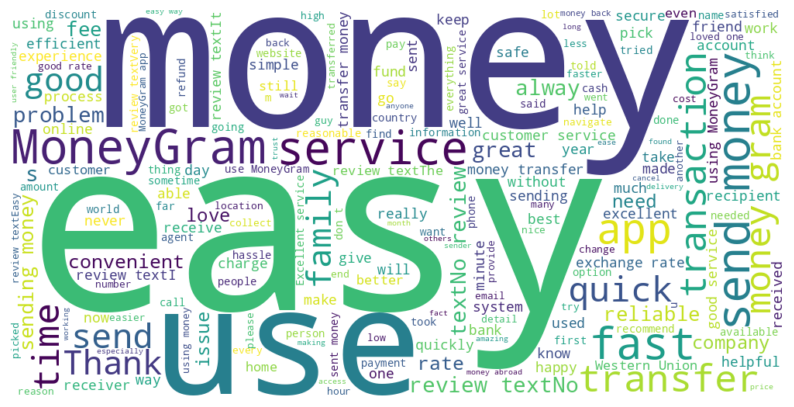

In [ ]:
plt.rcParams["figure.figsize"]=(10,10)
wordcloud=WordCloud(width=1000, height=500, background_color='white', stopwords=new_stopwords,colormap='viridis').generate(text)
plt.plot()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.head()

,Author,Reviews,Location,Ratings,Review Title,review,Date of Experience,sentiments
0,Uha,1,TO,5,I totally understand that rates are…,I totally understand that rates are fluctuatin...,2024-05-23,1
1,Rene,1,US,5,I have not encountered any issues…,I have not encountered any issues whatsoever. ...,2024-05-09,1
2,Runi Saad,10,GB,5,Moneygram is a good and reliable company,Moneygram always my favourite company when I t...,2024-05-19,1
3,NK,1,AU,5,Convenient and efficient,"Quick and simple transaction via the App, very...",2024-04-30,1
4,Sambamwani,1,GB,5,You have been so much helpful as the…,You have been so much helpful as the recipient...,2024-05-23,1


In [ ]:
df["sentiments"].value_counts()

,count
sentiments,
1,7726
0,2073


Positive Word Cloud

In [ ]:
positive_reviews = df[df["sentiments"] == 1]["review"]
all_words_positive= ' '.join(positive_reviews)

In [ ]:
all_words_positive

'I totally understand that rates are fluctuating from time to time, what i like MG the most is that its fast and secure. How ever this is my very first time to have an account and is able to send money internationally. Apart from unstable internet connection i made so many attempts in creating my account due to errors. Finally im able to use it, what i fear is the fact that my family and friends back home where i send money to, have been once or twice blocked from receiving money on Money Gram without knowing why.  Therefore, i would like to know your reasons for those problems, as overcome by one of my friends, he was already sent money, but told by the teller that his named os blocked. The sender had to wait for a week or 2 until it got refunded to be send to another person. However the blocked person waited for 3 months until his name was unblocked due to the help of a BSP banker. please clarify on that.  I have not encountered any issues whatsoever.  Everything has go e smoothly so

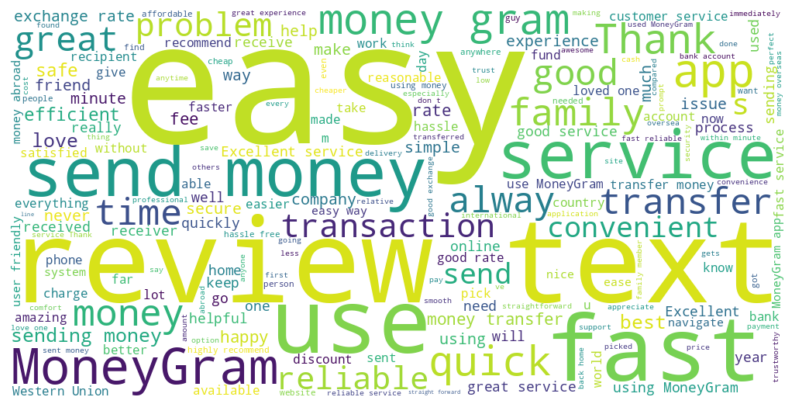

In [ ]:
wordcloud=WordCloud(width=1000, height=500, background_color='white', stopwords=new_stopwords,colormap='viridis').generate(all_words_positive)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Negative Word Cloud

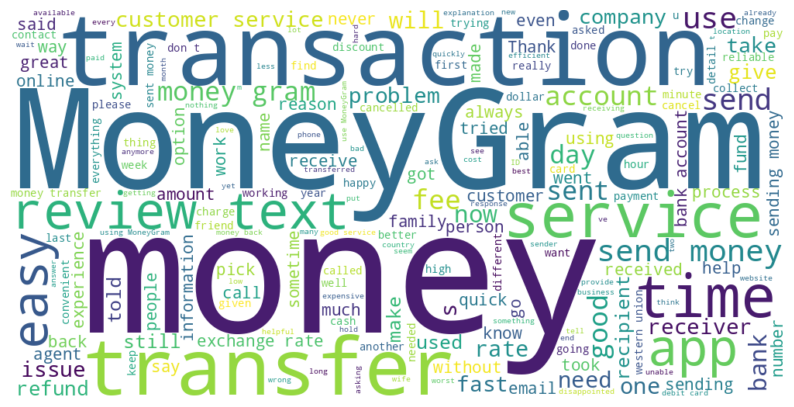

In [ ]:
negative_reviews = df[df["sentiments"] == 0]["review"]
all_words_negative= ' '.join(negative_reviews)
wordcloud=WordCloud(width=1000, height=500, background_color='white', stopwords=new_stopwords,colormap='viridis').generate(all_words_negative)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

MODEL CREATION

TF-IDF

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv=TfidfVectorizer(max_features=5000)
x=cv.fit_transform(review).toarray()
y=df.iloc[:,-1].values

NameError: name 'review' is not defined

Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=0)


NameError: name 'x' is not defined

Numpy array conversion by toarray

In [ ]:
print("x.shape=",x.shape)

NameError: name 'x' is not defined

In [ ]:
x[0]

NameError: name 'x' is not defined

In [ ]:
print("y.shape",y.shape)

y.shape (9799,)


Defining the models and training them

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier=LogisticRegression()              # Creat and run classifier
classifier.fit(trainx,trainy)                # Train the classifier

LogisticRegression()

In [ ]:
predictions=classifier.predict(testx)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_pred=classifier.predict(testx)
print (confusion_matrix(testy,y_pred))
print (classification_report(testy,y_pred))

[[   1  411]
 [   4 1544]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00       412
           1       0.79      1.00      0.88      1548

    accuracy                           0.79      1960
   macro avg       0.49      0.50      0.44      1960
weighted avg       0.67      0.79      0.70      1960



2. Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
classifierSVC=LinearSVC()
classifierSVC.fit(trainx,trainy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



LinearSVC()

In [ ]:
predictions=classifierSVC.predict(testx)

In [ ]:
y_pred=classifierSVC.predict(testx)
print (confusion_matrix(testy,y_pred))
print (classification_report(testy,y_pred))

[[  24  388]
 [ 101 1447]]
              precision    recall  f1-score   support

           0       0.19      0.06      0.09       412
           1       0.79      0.93      0.86      1548

    accuracy                           0.75      1960
   macro avg       0.49      0.50      0.47      1960
weighted avg       0.66      0.75      0.69      1960



3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifierNB=MultinomialNB()
classifierNB.fit(trainx,trainy)

MultinomialNB()

In [ ]:
predictions=classifierNB.predict(testx)

In [ ]:
y_pred=classifierNB.predict(testx)
print (confusion_matrix(testy,y_pred))
print (classification_report(testy,y_pred))

[[   7  405]
 [  24 1524]]
              precision    recall  f1-score   support

           0       0.23      0.02      0.03       412
           1       0.79      0.98      0.88      1548

    accuracy                           0.78      1960
   macro avg       0.51      0.50      0.45      1960
weighted avg       0.67      0.78      0.70      1960



4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifierRF=RandomForestClassifier()
classifierRF.fit(trainx,trainy)

RandomForestClassifier()

In [ ]:
predictions=classifierRF.predict(testx)

In [ ]:
y_pred=classifierRF.predict(testx)
print (confusion_matrix(testy,y_pred))
print (classification_report(testy,y_pred))

[[  31  381]
 [ 123 1425]]
              precision    recall  f1-score   support

           0       0.20      0.08      0.11       412
           1       0.79      0.92      0.85      1548

    accuracy                           0.74      1960
   macro avg       0.50      0.50      0.48      1960
weighted avg       0.67      0.74      0.69      1960



5. K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifierKNN=KNeighborsClassifier()
classifierKNN.fit(trainx,trainy)

KNeighborsClassifier()

In [ ]:
prediction=classifierKNN.predict(testx)

In [ ]:
y_pred=classifierKNN.predict(testx)
print (confusion_matrix(testy,y_pred))
print (classification_report(testy,y_pred))

[[  17  395]
 [  59 1489]]
              precision    recall  f1-score   support

           0       0.22      0.04      0.07       412
           1       0.79      0.96      0.87      1548

    accuracy                           0.77      1960
   macro avg       0.51      0.50      0.47      1960
weighted avg       0.67      0.77      0.70      1960



# New Section

In [ ]:
x=np.array(df.iloc[:,0].values)
y=np.array(df.sentiments.values)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(x).toarray()